In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

In [2]:
driver = webdriver.Chrome()
driver.get('https://internshala.com/internships/engineering-internship/index=0/')

html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
# web = requests.get('https://internshala.com/internships/engineering-internship/index=0/').text
# soup = BeautifulSoup(web, 'lxml')
print(soup.prettify())

<html class="js-focus-visible" lang="en" style="--scrollbar-width:17px;" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta content="IE=9" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0 user-scalable=0" name="viewport"/>
  <meta content="702141670710132" property="fb:app_id"/>
  <meta content="website" property="og:type"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="@Internshala" name="twitter:site"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="@internshala" name="twitter:creator"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="#ffffff" name="msapplication-navbutton-color"/>
  <meta content="telephone=no" name="format-detection"/>
  <link as="font" crossorigin="" href="/static/fonts/Inter.woff2?v=3.11" rel="preload" type=

In [3]:
company_name=[]
for i in soup.find_all('a', class_='link_display_like_text view_detail_button'):
    company_name.append(i.text.strip())

print(len(company_name))
company_name

40


['Skill-Lync',
 'Paisabazaar',
 'IIT Bombay',
 'IIT Bombay',
 'Actolap Solutions India Private Limited',
 'Royal Enfield',
 'Viacom India LLP',
 'IIT Bombay',
 'IIT Bombay',
 'Technoculture Research',
 'FinLock Technologies Private Limited',
 'Everything Under You (EUY)',
 'Snoh Technologies',
 'ILife Digital Solutions',
 'ZEROBILL',
 'SkillBit',
 'Technoculture Research',
 'Technoculture Research',
 'Digital Shoppe',
 'Pepcorns LLP',
 'Requin Solutions Private Limited',
 'Way2Agribusiness India Private Limited',
 'Paradise Edu Services',
 'Paradise Edu Services',
 'BatteryPool',
 'Rajat Agrawal Creators',
 'SPRAT - Society For Promoting Rationality',
 'Sigroo Technologies Private Limited',
 'Buddha Education Association Incorporation',
 'S7works',
 'Advantage',
 'Buddha Education Association Incorporation',
 'Buddha Education Association Incorporation',
 'Buddha Education Association Incorporation',
 'Buddha Education Association Incorporation',
 'Metaverse Ventures Private Limited',


In [4]:
job_title=[]
for i in soup.find_all('h3', class_='heading_4_5 profile'):
    job_title.append(i.text.strip())

# len(job_title)
job_title



l = []
location = []
for p in soup.find_all('p', id="location_names"):
    for i in p.find('a', class_="location_link view_detail_button"):
        l.append(i.text.strip())
    location.append(l)
    l = []
for div in soup.find_all('div', id="location_names"):
    for i in div.find('a', class_="location_link view_detail_button"):
        l.append(i.text.strip())
    location.append(l)
    l = []
# for div in soup.find_all('div', class_="individual_internship_details  individual_internship_job"):
#     print('e')
    # for i in div.find_all('p'):
    #     print(i.text.strip())
    #     for j in i.find_all('span'):
    #         print(j.text.strip())
# for p in soup.find_all('p', id='location_names'):
#     for i in p.find_all('span'):
#         for j in i.find_all('a', class_='location_link view_detail_button'):
#             print(j.text.strip())
        # # print(i)
            # print(j)
            # l.append(j.text.strip())
            # print(l)
#     location.append(l)
    # l=[]
print(len(job_title))
# print(location[2])
print(len(location))
# print(count)

40
40


In [5]:
import re

skills_reqd=[]
about_company=[]
job_responsibilities=[]
job_requirements=[]
l2=[]
l1=[]
for div in soup.find_all('div', class_="cta_container"):
    url = "https://internshala.com/"+div.find('a')['href']
    web2 = requests.get(url).text
    # print(url)
    #-------------------------------------------------------------------------------------
    soup2 = BeautifulSoup(web2, 'lxml')
    for i in soup2.find_all('div', class_='round_tabs_container'):
        skills_reqd.append(i.text.strip().replace('\n', ', ').replace('\r', ''))
        break
    for i in soup2.find_all('div', class_='text-container about_company_text_container'):
        about_company.append(i.text.strip())
    #-------------------------------------------------------------------------------------
    for div2 in soup2.find_all('div', class_='internship_details'):
            # count+=1
        for i in div2.select("div[class='text-container']"):
            txt = i.text.strip()
            # print(txt)
            if("Key responsibilities:" in txt):
                # print("yay")
                responsibilities = txt.split("Key responsibilities:")[1].split("Requirements:")[0].strip()
                
                #remove index numbers from responsibilities
                responsibilities = re.sub(r'\d+\.', '', responsibilities)
                responsibilities = responsibilities.replace("\n", ',')
                
                
                l1.append(responsibilities)
                # print(l1)
            # if "Key responsibilities:\n" in txt:
            #     print("yay")
                # print("----")

            if ("Requirements:" in txt):
                requirements = txt.split("Requirements:")[1].strip()
                requirements = re.sub(r'\d+\.', '', requirements)
                requirements = requirements.replace("\n", ',')
                
                l2.append(requirements)
                # print(l2)
                
            
            # else:
            #     print("lol no")
                

            # if "Requirements:" in txt:
            #     requirements = txt.split("Requirements:")[1].strip()
            #     requirements = re.sub(r'\d+\.', '', requirements)
            #     requirements = requirements.replace("\n", ',')
            #     l2=[]
            #     l2.append(requirements)

            # else:
            #     print("Requirements not found in the text")
            # print(txt)
            # responsibilities = txt.split("Key responsibilities:")[1].split("Requirements:")[0].strip()
            # requirements = txt.split("Requirements:")[1].strip()
            # #remove index numbers from responsibilities
            # for d in responsibilities:
            #     if d.isdigit():
            #         responsibilities = responsibilities.replace(d+".", '')
            #         responsibilities = responsibilities.replace("\n", ',')
            
            # for d in requirements:
            #     if d.isdigit():
            #         requirements = requirements.replace(d+".", '')
            #         requirements = requirements.replace("\n", ',')
            # l1=[]
            # l2=[]
            # l1.append(responsibilities)
            # l2.append(requirements)
    
        
        job_responsibilities.append(l1)
        job_requirements.append(l2)
        
        
    

        
# print(count)
print(len(skills_reqd))
print(len(about_company))
print(len(job_responsibilities))
print(len(job_requirements))

40
40
40
40


In [6]:
df = pd.DataFrame({'Company Name':company_name, 'Job Title':job_title, 'About Company':about_company, 'Location':location, 'Skills Required':skills_reqd, 'Job responsibilities':job_responsibilities, 'Job requirements':job_requirements, 'Job responsibilities':job_responsibilities, 'Job responsibilities':job_responsibilities})

In [7]:
df.sample(5)

,Company Name,Job Title,About Company,Location,Skills Required,Job responsibilities,Job requirements
29,S7works,Backend Development (Python),S7works gets the work done while you build you...,[Work From Home],"Django, Golang, JavaScript, PostgreSQL, Python",[ Identifying new sales opportunities and hand...,[ Candidates should have an engineering mindse...
8,IIT Bombay,Software Project Management,"The Indian Institute of Technology, Bombay (II...",[Work From Home],"English Proficiency (Spoken), English Proficie...",[ Identifying new sales opportunities and hand...,[ Candidates should have an engineering mindse...
30,Advantage,Civil Engineering,We are a start-up exclusively engaged in the p...,[Dewas],"Engineering Surveying, English Proficiency (Sp...",[ Identifying new sales opportunities and hand...,[ Candidates should have an engineering mindse...
18,Digital Shoppe,Flutter Development,Digital Shoppe is a sole proprietorship based ...,[Gurgaon],"Dart, Firebase, Flutter, REST API",[ Identifying new sales opportunities and hand...,[ Candidates should have an engineering mindse...
13,ILife Digital Solutions,Documentation & Testing,ILife Digital Solutions is a software consulti...,[Mumbai],"MS-Excel, MS-Word",[ Identifying new sales opportunities and hand...,[ Candidates should have an engineering mindse...


In [8]:
df.isnull().sum()
type(df)

pandas.core.frame.DataFrame

In [9]:
df.shape

(40, 7)

In [10]:
df["Location"] = df["Location"].apply(lambda x: ', '.join(x))
df["Job responsibilities"] = df["Job responsibilities"].apply(lambda x: ', '.join(x))
df["Job requirements"] = df["Job requirements"].apply(lambda x: ', '.join(x))
df.sample(5)

,Company Name,Job Title,About Company,Location,Skills Required,Job responsibilities,Job requirements
5,Royal Enfield,Embedded Systems,The oldest motorcycle company in continuous pr...,Chennai,"Arduino, C Programming, Embedded Systems, MATL...",Identifying new sales opportunities and handl...,Candidates should have an engineering mindset...
16,Technoculture Research,Biotech Research,"Technoculture Research is based in Bodhgaya, B...",Work From Home,"Biology, Biostatistics, Mathematics, Molecular...",Identifying new sales opportunities and handl...,Candidates should have an engineering mindset...
13,ILife Digital Solutions,Documentation & Testing,ILife Digital Solutions is a software consulti...,Mumbai,"MS-Excel, MS-Word",Identifying new sales opportunities and handl...,Candidates should have an engineering mindset...
14,ZEROBILL,Web Development,A cleantech company with renewable energy prod...,Bangalore,"Django, Python",Identifying new sales opportunities and handl...,Candidates should have an engineering mindset...
15,SkillBit,Java Development,SkillBit is a leading staffing and recruitment...,Pune,Java,Identifying new sales opportunities and handl...,Candidates should have an engineering mindset...


In [11]:
df.duplicated().sum()

df['Skills Required'] = df['Skills Required'].str.replace(' ', '')
df['Location'] = df['Location'].str.replace(' ', '')
df['Job responsibilities'] = df['Job responsibilities'].str.replace(' ', ',')
df['Job requirements'] = df['Job requirements'].str.replace(' ', ',')

In [12]:
#create tags column which will contain keywords from Location, Skills Required, Job responsibilities, Job requirements
def add_comma(string):
    return string + ","
x = df['Job Title'].str.replace(' ', '')

# df['Tags'] = x.apply(add_comma) + ', ' + df['Skills Required'] + ', ' + df['Job responsibilities']
df['Tags'] = df['Job Title'] + ', ' + df['Skills Required'] + ', ' + df['Job responsibilities']

In [13]:
df.head()

,Company Name,Job Title,About Company,Location,Skills Required,Job responsibilities,Job requirements,Tags
0,Skill-Lync,Inside Sales Specialist,Skill-Lync is an e-learning platform that prov...,Hyderabad,"EnglishProficiency(Spoken),EnglishProficiency(...",",Identifying,new,sales,opportunities,and,handl...",",Candidates,should,have,an,engineering,mindset...","Inside Sales Specialist, EnglishProficiency(Sp..."
1,Paisabazaar,Frontend Development,Paisabazaar is India's largest consumer credit...,Gurgaon,"CSS,HTML,ReactJS",",Identifying,new,sales,opportunities,and,handl...",",Candidates,should,have,an,engineering,mindset...","Frontend Development, CSS,HTML,ReactJS, ,Ident..."
2,IIT Bombay,Machine Learning,"The Indian Institute of Technology, Bombay (II...",WorkFromHome,"ComputerVision,DeepLearning,MachineLearning,Ma...",",Identifying,new,sales,opportunities,and,handl...",",Candidates,should,have,an,engineering,mindset...","Machine Learning, ComputerVision,DeepLearning,..."
3,IIT Bombay,C++ Development (QT Creator),"The Indian Institute of Technology, Bombay (II...",WorkFromHome,"C++Programming,CProgramming,DataStructures",",Identifying,new,sales,opportunities,and,handl...",",Candidates,should,have,an,engineering,mindset...","C++ Development (QT Creator), C++Programming,C..."
4,Actolap Solutions India Private Limited,Product Management,Actolap Solutions India Private Limited builds...,Noida,"EnglishProficiency(Spoken),EnglishProficiency(...",",Identifying,new,sales,opportunities,and,handl...",",Candidates,should,have,an,engineering,mindset...","Product Management, EnglishProficiency(Spoken)..."


In [14]:
df["Tags"]

0     Inside Sales Specialist, EnglishProficiency(Sp...
1     Frontend Development, CSS,HTML,ReactJS, ,Ident...
2     Machine Learning, ComputerVision,DeepLearning,...
3     C++ Development (QT Creator), C++Programming,C...
4     Product Management, EnglishProficiency(Spoken)...
5     Embedded Systems, Arduino,CProgramming,Embedde...
6     Web Development, AmazonWebServer(AWS),Bootstra...
7     Web Development (Django), Bootstrap,CloudCompu...
8     Software Project Management, EnglishProficienc...
9     JavaScript Frontend Engineering, CSS,GitHub,Ja...
10    Java Spring Development, Java,SpringMVC, ,Iden...
11    Full Stack Development, AngularJS,CSS,HTML,Jav...
12    Android App Development, Android,Firebase,Kotl...
13    Documentation & Testing, MS-Excel,MS-Word, ,Id...
14    Web Development, Django,Python, ,Identifying,n...
15    Java Development, Java, ,Identifying,new,sales...
16    Biotech Research, Biology,Biostatistics,Mathem...
17    JavaScript Backend Engineering, DatabaseTe

In [15]:
df_new = df[["Company Name", "Job Title", "Tags"]]
df_new.head()

,Company Name,Job Title,Tags
0,Skill-Lync,Inside Sales Specialist,"Inside Sales Specialist, EnglishProficiency(Sp..."
1,Paisabazaar,Frontend Development,"Frontend Development, CSS,HTML,ReactJS, ,Ident..."
2,IIT Bombay,Machine Learning,"Machine Learning, ComputerVision,DeepLearning,..."
3,IIT Bombay,C++ Development (QT Creator),"C++ Development (QT Creator), C++Programming,C..."
4,Actolap Solutions India Private Limited,Product Management,"Product Management, EnglishProficiency(Spoken)..."


In [16]:
def remove_comma(string):
    return string.replace(',', ' ')

df_new["Tags"] = df_new["Tags"].apply(remove_comma)
df_new.head()

C:\Users\dakshi\AppData\Local\Temp\ipykernel_20388\1771189987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Tags"] = df_new["Tags"].apply(remove_comma)


,Company Name,Job Title,Tags
0,Skill-Lync,Inside Sales Specialist,Inside Sales Specialist EnglishProficiency(Sp...
1,Paisabazaar,Frontend Development,Frontend Development CSS HTML ReactJS Ident...
2,IIT Bombay,Machine Learning,Machine Learning ComputerVision DeepLearning ...
3,IIT Bombay,C++ Development (QT Creator),C++ Development (QT Creator) C++Programming C...
4,Actolap Solutions India Private Limited,Product Management,Product Management EnglishProficiency(Spoken)...


In [17]:
import nltk
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()

def stem(text):
    y=[]
    for i in text.split():
        y.append(i.lower())
    return ' '.join(y)

df_new['Tags'] = df_new['Tags'].apply(stem)
df_new.head()

C:\Users\dakshi\AppData\Local\Temp\ipykernel_20388\775982376.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Tags'] = df_new['Tags'].apply(stem)


,Company Name,Job Title,Tags
0,Skill-Lync,Inside Sales Specialist,inside sales specialist englishproficiency(spo...
1,Paisabazaar,Frontend Development,frontend development css html reactjs identify...
2,IIT Bombay,Machine Learning,machine learning computervision deeplearning m...
3,IIT Bombay,C++ Development (QT Creator),c++ development (qt creator) c++programming cp...
4,Actolap Solutions India Private Limited,Product Management,product management englishproficiency(spoken) ...


In [18]:
# df_new["Tags"][0]
#convert to csv
df_new.to_csv('internshala.csv', index=False)

In [47]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features = 100, stop_words='english')
# vectors = cv.fit_transform(df_new['Tags']).toarray()
# vectors[0].shape

In [48]:
# cv.get_feature_names()

In [49]:
# from sklearn.metrics.pairwise import cosine_similarity
# similarity = cosine_similarity(vectors)
# sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x:x[1])[1:6]

In [50]:
# def similar_jobs(title):
#     job_tit = df_new[df_new['Job Title'] == title]
#     dist = similarity[job_tit]
#     job_index = sorted(list(enumerate(dist[0])), reverse=True, key=lambda x:x[1])
#     for i in job_index:
#         print(df_new['Job Title'][i[0]])
# similar_jobs('Data Scientist')

In [19]:
df_new.head()

,Company Name,Job Title,Tags
0,Skill-Lync,Inside Sales Specialist,inside sales specialist englishproficiency(spo...
1,Paisabazaar,Frontend Development,frontend development css html reactjs identify...
2,IIT Bombay,Machine Learning,machine learning computervision deeplearning m...
3,IIT Bombay,C++ Development (QT Creator),c++ development (qt creator) c++programming cp...
4,Actolap Solutions India Private Limited,Product Management,product management englishproficiency(spoken) ...


In [29]:
skills=['seo cryptography nosql programming javascript testing js c english requests coding email website java api python system docker design github ai health html']

In [27]:
# !pip install ftfy
import re

from ftfy import fix_text

def ngrams(string, n=3):
    string = fix_text(string) # fix text
    string = string.encode("ascii", errors="ignore").decode() #remove non ascii chars
    string = string.lower()
    chars_to_remove = [")","(",".","|","[","]","{","}","'"]
    rx = '[' + re.escape(''.join(chars_to_remove)) + ']'
    string = re.sub(rx, '', string)
    string = string.replace('&', 'and')
    string = string.replace(',', ' ')
    string = string.replace('-', ' ')
    string = string.title() # normalise case - capital at start of each word
    string = re.sub(' +',' ',string).strip() # get rid of multiple spaces and replace with a single
    string = ' '+ string +' ' # pad names for ngrams...
    string = re.sub(r'[,-./]|\sBD',r'', string)
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

     ---------------------------------------- 53.1/53.1 kB 2.9 MB/s eta 0:00:00


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams, lowercase=False)
tfidf = vectorizer.fit_transform(skills)

In [31]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, n_jobs=-1).fit(tfidf)
test = (df_new['Tags'].values.astype('U'))

In [32]:
def getNearestN(query):
  queryTFIDF_ = vectorizer.transform(query)
  distances, indices = nbrs.kneighbors(queryTFIDF_)
  return distances, indices

In [33]:
distances, indices = getNearestN(test)
test = list(test) 
matches = []

In [34]:
for i,j in enumerate(indices):
    dist=round(distances[i][0],2)
  
    temp = [dist]
    matches.append(temp)
    
matches = pd.DataFrame(matches, columns=['Match confidence'])

In [35]:
df_new['match']=matches['Match confidence']
df1=df_new.sort_values('match')
df1[['Company Name','Job Title']].head(5).reset_index()

C:\Users\dakshi\AppData\Local\Temp\ipykernel_20388\309758040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['match']=matches['Match confidence']


,index,Company Name,Job Title
0,34,Buddha Education Association Incorporation,Blockchain Development
1,9,Technoculture Research,JavaScript Frontend Engineering
2,11,Everything Under You (EUY),Full Stack Development
3,17,Technoculture Research,JavaScript Backend Engineering
4,29,S7works,Backend Development (Python)


In [44]:
ans=df1.sort_values(by='match', ascending=False).head(5)
print(ans.head(5))
# df1.head()

                        Company Name  \
2                         IIT Bombay   
20  Requin Solutions Private Limited   
22             Paradise Edu Services   
23             Paradise Edu Services   
12                 Snoh Technologies   

                                         Job Title  \
2                                 Machine Learning   
20                             Network Engineering   
22       Subject Matter Expert (Civil Engineering)   
23  Subject Matter Expert (Mechanical Engineering)   
12                         Android App Development   

                                                 Tags  match  
2   machine learning computervision deeplearning m...   1.08  
20  network engineering ccna identifying new sales...   1.08  
22  subject matter expert (civil engineering) engi...   1.08  
23  subject matter expert (mechanical engineering)...   1.08  
12  android app development android firebase kotli...   1.07  


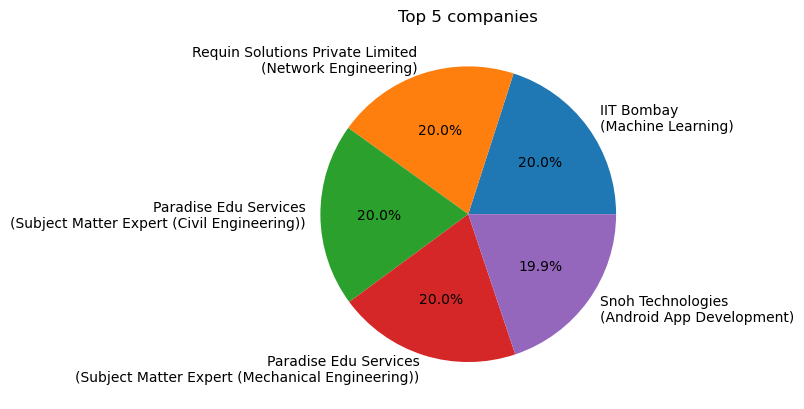

In [50]:
import matplotlib.pyplot as plt

names = ans['Company Name']+'\n('+ans['Job Title']+')'
index = ans['match']

plt.pie(index, labels=names, autopct = '%1.1f%%')
plt.title('Top 5 companies')
plt.show()

In [49]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

In [48]:
# tfidf = TfidfVectorizer()
# tag_vectors = tfidf.fit_transform(df_new['Tags'])
# text_vector = tfidf.transform([' '.join(new_data)])
# text_vector

In [47]:
# # Compute the cosine similarity between your text and each row of the 'tags' column
# similarity_scores = cosine_similarity(text_vector, tag_vectors)[0]
# df_new['similarity'] = similarity_scores
# # Sort the rows based on the similarity scores and return the top 5
# top_5 = df_new.nlargest(5, 'similarity')
# top_5

In [46]:
# Create a pie chart of the similarity scores for the top 5 rows
# import matplotlib.pyplot as plt
# plt.pie(top_5['similarity'], labels=top_5['Company Name'], autopct='%1.1f%%')
# plt.title('Similarity Scores for Top 5 Companies')
# plt.show()